In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('/Bank Customer Churn Prediction.csv')

# **DISPLAY TOP 5 ROWS OF THE DATASET**

In [ ]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# **DISPLAY LAST 5 ROWS OF THE DATASET**

In [ ]:
data.tail()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


## **DISPLAY RANDOM 5 ROWS**

In [ ]:
data.sample(5)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
8341,15749807,516,Spain,Female,31,3,0.00,2,1,0,124202.26,0
6713,15666711,586,France,Female,46,0,0.00,3,0,1,131553.82,1
2674,15756472,804,France,Male,25,7,108396.67,1,1,0,128276.95,0
4340,15692631,577,Spain,Female,44,8,115557.00,1,0,1,127506.76,0
7655,15594651,748,France,Male,38,4,115221.36,1,0,1,70956.75,0


# **Get information about the dataset(like datatype,memory requirement,rows,columns)**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


# **SHAPE OF DATASET(finding number of rows and columns of dataset)**

In [ ]:
data.shape

(10000, 12)

In [ ]:
print('Number of Rows',data.shape[0])
print('Number of Columns',data.shape[1])

Number of Rows 10000
Number of Columns 12


# **Check for null values**

In [ ]:
data.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

# **Overall statistics of the dataset**

In [ ]:
data.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# **Identify numerical and categorical variables in the dataset**

In [ ]:
numerical_variables = data.select_dtypes(include=['int', 'float']).columns
categorical_variables = data.select_dtypes(include=['object']).columns

print("Numerical Variables:", numerical_variables)
print("Categorical Variables:", categorical_variables)

Numerical Variables: Index(['customer_id', 'credit_score', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn'],
      dtype='object')
Categorical Variables: Index(['country', 'gender'], dtype='object')


## **Univariate Analysis**
### Uni means single and variate means variable. Hence univariate means the analysis of a single variable. In univariate analysis, we are trying to analyse the pattern present in a single variable.





# **Univariate analysis for numerical variables**

**1.Histogram:** Histogram is used to plot the graphical representation of a numerical variable. The x-axis represents the numeric data and y-axis represents the respective count of the data.
Here x-axis represents the credit_score and y-axis represents the count.

### Here x-axis represents the credit_score column and y-axis represents the count.

<Axes: xlabel='credit_score', ylabel='Count'>

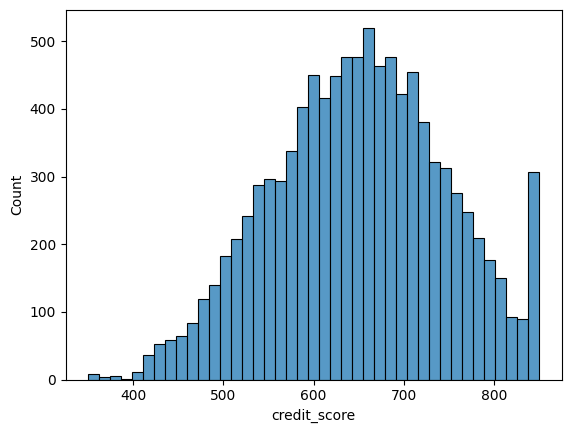

In [ ]:
sns.histplot(data, x='credit_score')

# Plotting a histogram of the 'age' column

<Axes: xlabel='age', ylabel='Count'>

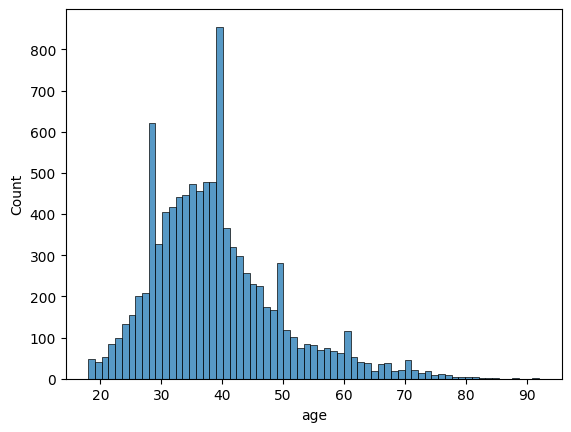

In [ ]:
sns.histplot(data, x='age')

## **Plotting a histogram of the 'TENURE' column**
## "Tenure" typically refers to the length of time a customer has been with the bank.

<Axes: xlabel='tenure', ylabel='Count'>

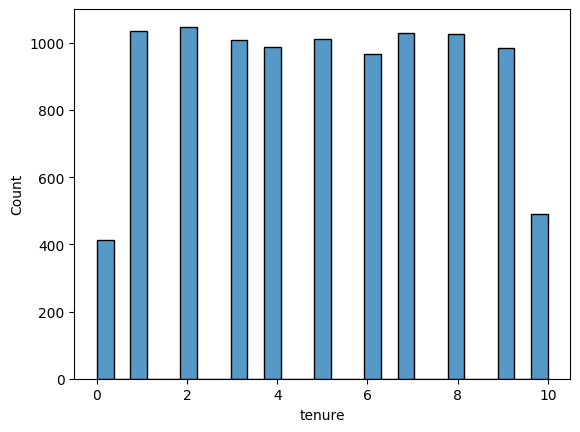

In [ ]:
sns.histplot(data, x='tenure')

### **2.Box plot:** Box plot is created to get the summary of variable ie. minimum, first quartile, median, 3rd quartile and maximum.

<Axes: >

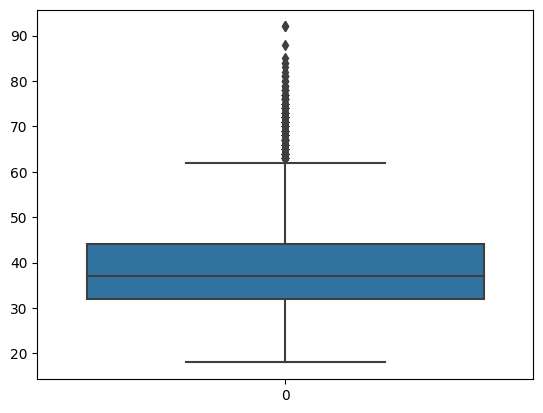

In [ ]:
sns.boxplot(data["age"])

<Axes: >

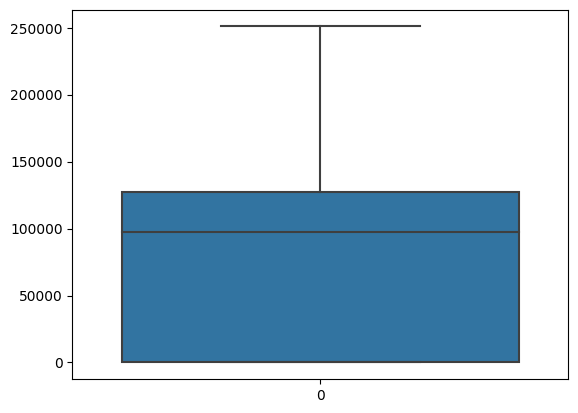

In [ ]:
sns.boxplot(data["balance"])

<Axes: >

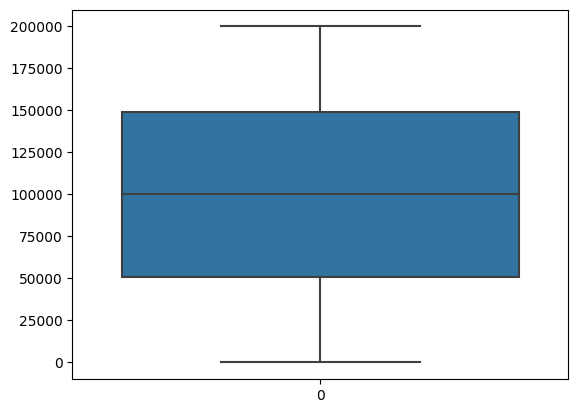

In [ ]:
sns.boxplot(data["estimated_salary"])

# **Count plot:** The count plot is similar to the histogram. But unlike histogram count plot represents frequency distribution of categorical data.

<Axes: xlabel='gender', ylabel='count'>

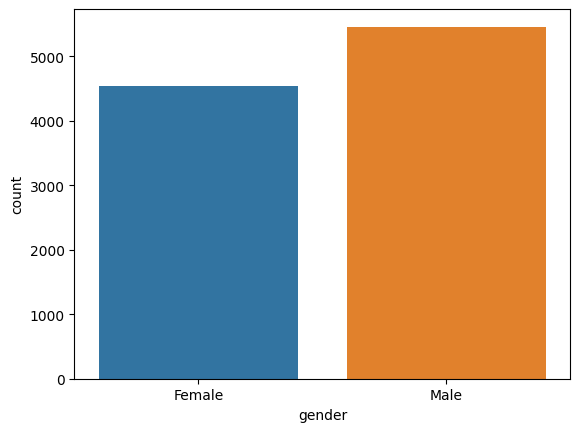

In [ ]:
sns.countplot(data, x="gender")

<Axes: xlabel='country', ylabel='count'>

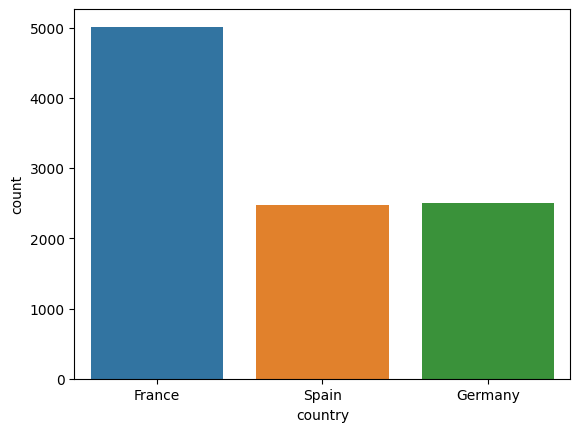

In [ ]:
sns.countplot(data, x="country")

**Pie** **Chart**: A piechart is a circular graph that is divided into slices like pies in order to represent numerical proportions of a variable

## a pie chart to visualize the distribution of values in the 'country' column of the dataset.

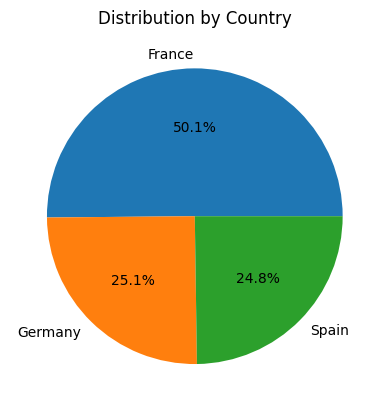

In [ ]:

country = data['country'].value_counts()

plt.pie(country.values, labels=country.index, autopct='%1.1f%%')

plt.title("Distribution by Country")

plt.show()


# **Violin** **plot**
A violin plot is a combination of a box plot and a histogram

<Axes: >

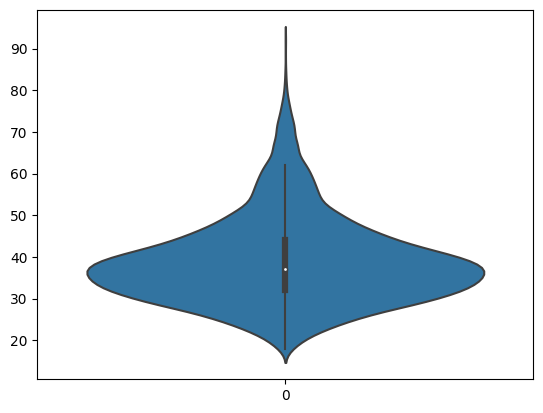

In [ ]:
sns.violinplot(data["age"])

<Axes: >

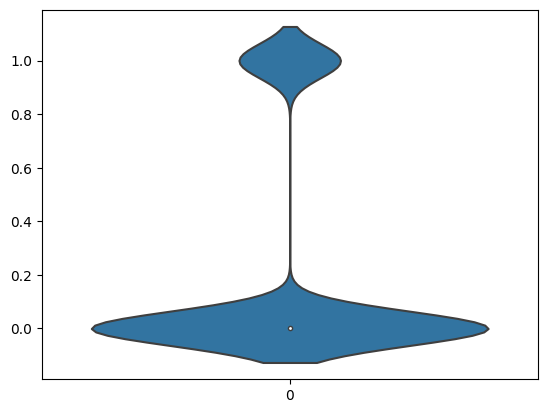

In [ ]:
sns.violinplot(data["churn"])

# **Bivariate Analysis**
Bivariate means the analysis of two variables. Using bivariate analysis we can find how well the variables are correlated.

## **Scatterplot**: Scatterplot uses dots to represent the relationship between two numeric variables.

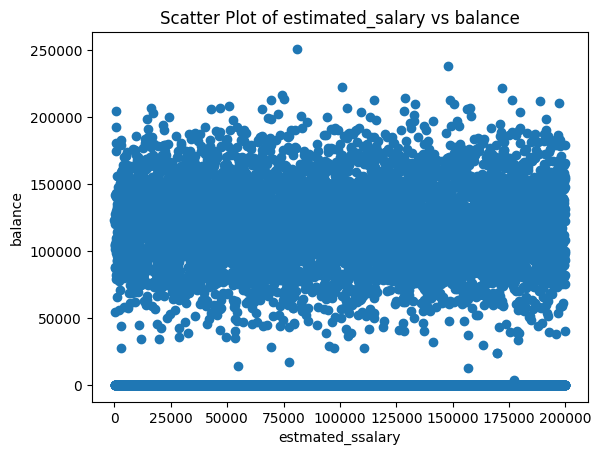

In [ ]:
plt.scatter(data["estimated_salary"], data["balance"])
plt.title("Scatter Plot of estimated_salary vs balance")
plt.xlabel("estmated_ssalary")
plt.ylabel("balance")
plt.show()

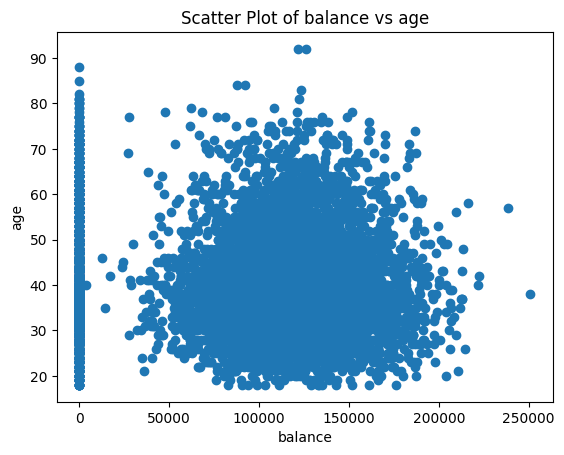

In [ ]:
plt.scatter(data["balance"], data["age"])
plt.title("Scatter Plot of balance vs age")
plt.xlabel("balance")
plt.ylabel("age")
plt.show()

## **Count** **plot**: Using the hue parameter we can analyse two categorical variables in a count plot.
Hue Variable: The additional categorical variable that determines the colors or groups within the main categorical variable.

<Axes: xlabel='country', ylabel='count'>

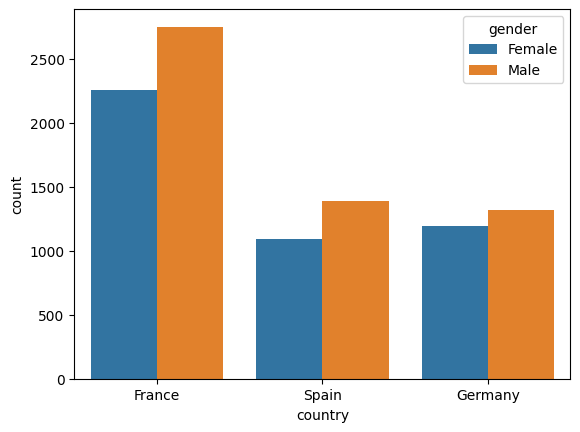

In [ ]:
sns.countplot(data, x="country", hue="gender")

<Axes: xlabel='gender', ylabel='churn'>

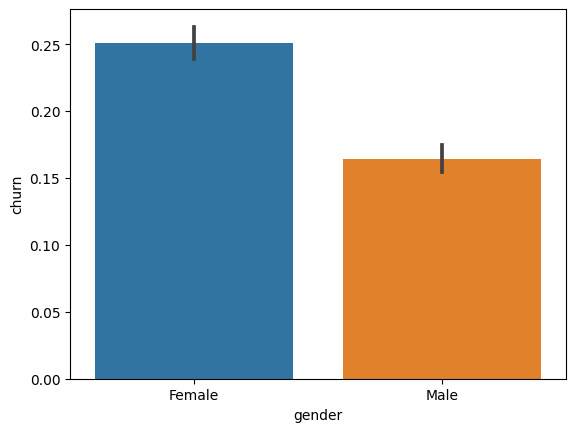

In [ ]:
sns.barplot(data, x="gender", y="churn")

Text(0.5, 1.0, 'Violin Plot of Age by active_member')

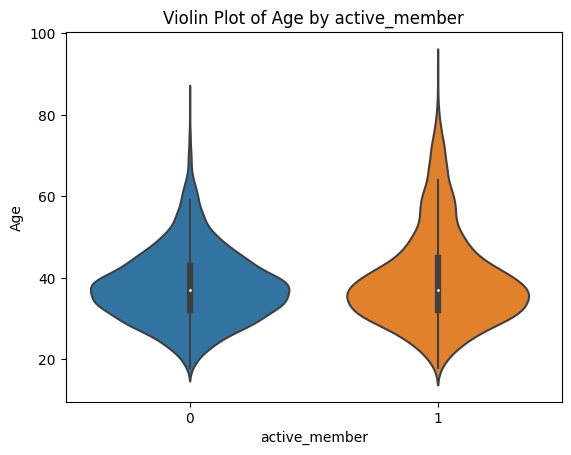

In [ ]:
sns.violinplot(x='active_member', y='age', data=data)

# Adding labels and title
plt.xlabel('active_member')
plt.ylabel('Age')
plt.title('Violin Plot of Age by active_member')